Student Name: Ze Chen

# Task 1 Ames Housing Sale Price Analysis

data source:
http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls

data dictionary:
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd #read xls
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
housing = pd.read_excel('AmesHousing.xls',index_col=0)

In [3]:
housing.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Drop PID, since PID is a primary key and won't be used for modeling.

In [4]:
housing = housing.drop(['PID'], axis=1)

Change 'MS SubClass' to object type because it's a nomial variable.

In [5]:
housing['MS SubClass'] = housing['MS SubClass'].astype('str')
housing['MS SubClass'] = housing['MS SubClass'].astype('object')

## 1.1  
Visualize the univariate distribution of each continuous, and the distribution of the target. Pay attention to something that might require special treatment.

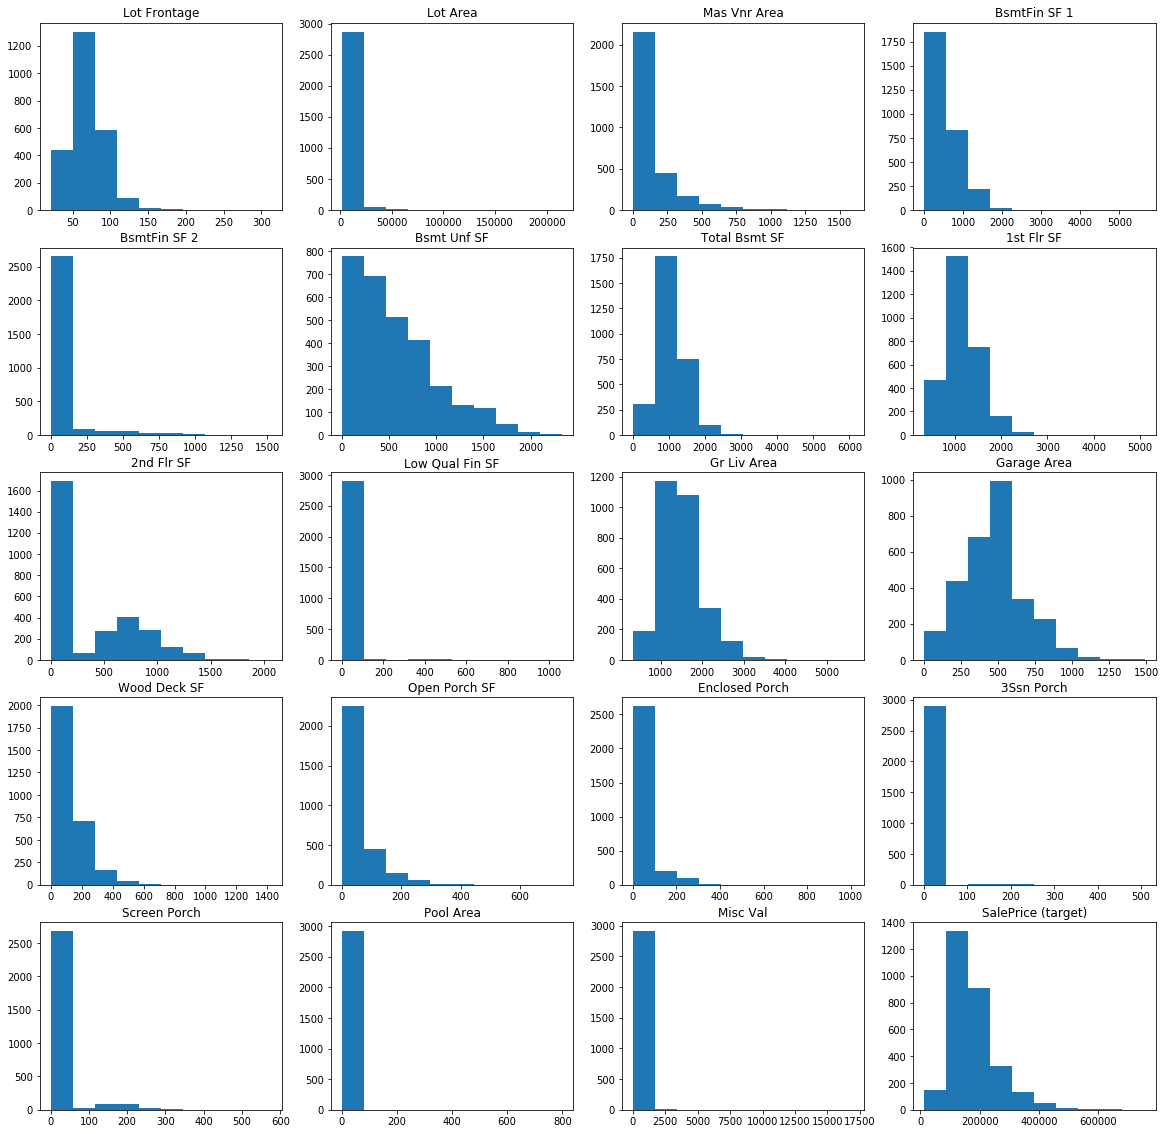

In [6]:
fig, ax = plt.subplots(5, 4 ,figsize=(20,20))

ax[0,0].hist(housing['Lot Frontage'])
ax[0,0].set_title('Lot Frontage')
ax[0,1].hist(housing['Lot Area'])
ax[0,1].set_title('Lot Area')
ax[0,2].hist(housing['Mas Vnr Area'])
ax[0,2].set_title('Mas Vnr Area')
ax[0,3].hist(housing['BsmtFin SF 1'])
ax[0,3].set_title('BsmtFin SF 1')

ax[1,0].hist(housing['BsmtFin SF 2'])
ax[1,0].set_title('BsmtFin SF 2 ')
ax[1,1].hist(housing['Bsmt Unf SF'])
ax[1,1].set_title('Bsmt Unf SF')
ax[1,2].hist(housing['Total Bsmt SF'])
ax[1,2].set_title('Total Bsmt SF')
ax[1,3].hist(housing['1st Flr SF'])
ax[1,3].set_title('1st Flr SF')

ax[2,0].hist(housing['2nd Flr SF'])
ax[2,0].set_title('2nd Flr SF')
ax[2,1].hist(housing['Low Qual Fin SF'])
ax[2,1].set_title('Low Qual Fin SF')
ax[2,2].hist(housing['Gr Liv Area'])
ax[2,2].set_title('Gr Liv Area')
ax[2,3].hist(housing['Garage Area'])
ax[2,3].set_title('Garage Area')

ax[3,0].hist(housing['Wood Deck SF'])
ax[3,0].set_title('Wood Deck SF')
ax[3,1].hist(housing['Open Porch SF'])
ax[3,1].set_title('Open Porch SF')
ax[3,2].hist(housing['Enclosed Porch'])
ax[3,2].set_title('Enclosed Porch')
ax[3,3].hist(housing['3Ssn Porch'])
ax[3,3].set_title('3Ssn Porch')

ax[4,0].hist(housing['Screen Porch'])
ax[4,0].set_title('Screen Porch')
ax[4,1].hist(housing['Pool Area'])
ax[4,1].set_title('Pool Area')
ax[4,2].hist(housing['Misc Val'])
ax[4,2].set_title('Misc Val')
ax[4,3].hist(housing['SalePrice'])
ax[4,3].set_title('SalePrice (target)')

plt.show()

### Explanation:

Most of variables are highly right-skewed, which means large outliers exist. We may need to drop outliers or standardize continuous varibales before analysis.

The variable 2nd Flr SF may need special attention, because by ingoring the first bar, the variable approximately follows normal distribution. This special distribution may be caused by many houses don't have second floor(2nd Flr SF=0).

We also need to pay attention to discrete variables.

## 1.2
Visualize the dependency of the target on each continuous feature (2d scatter plot)

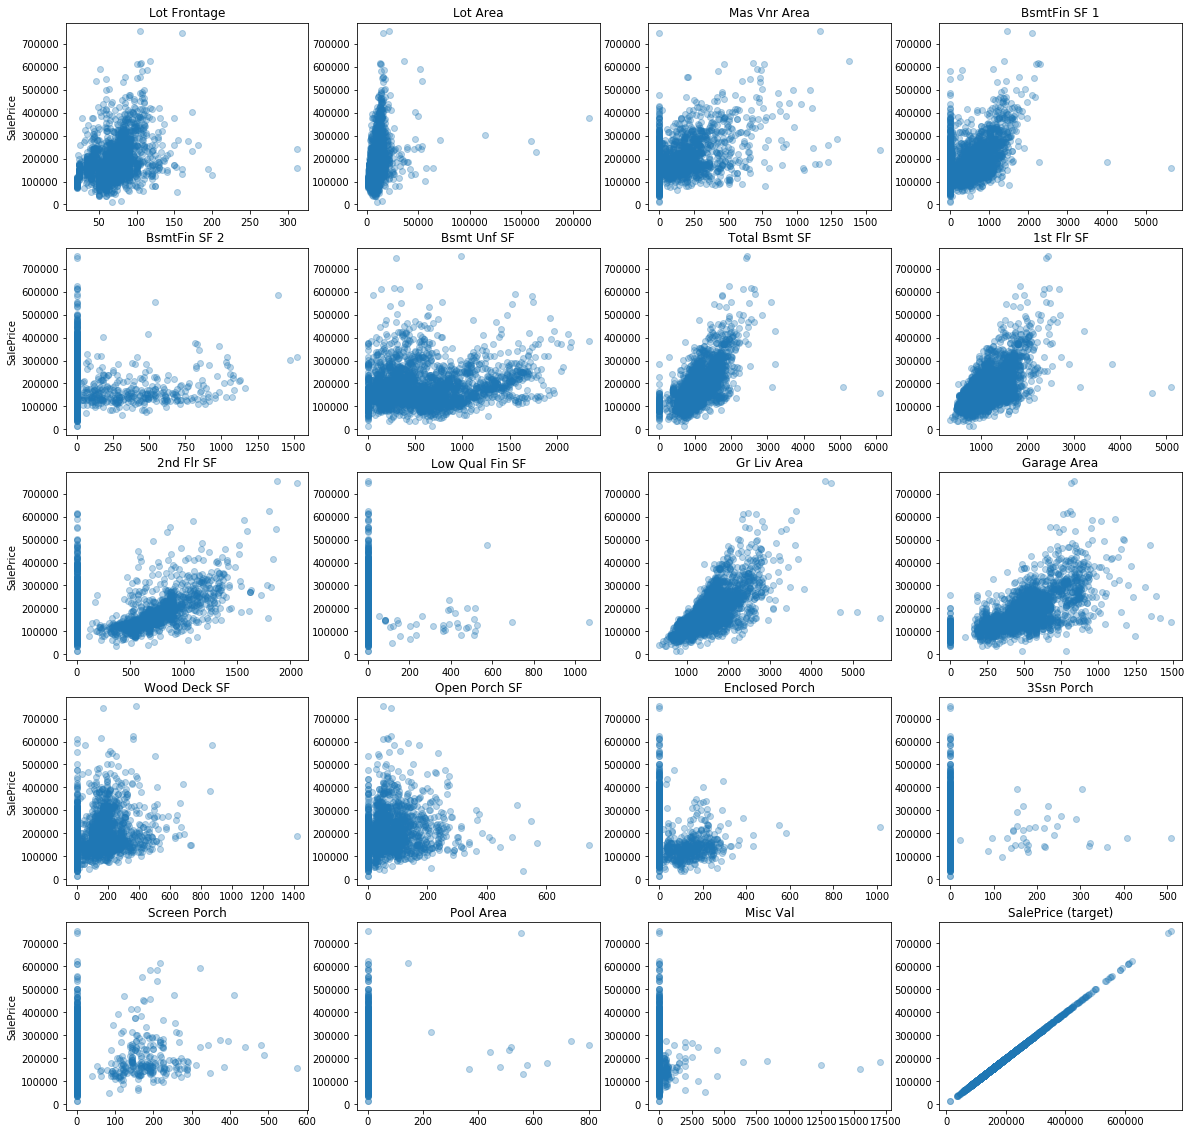

In [7]:
target = housing['SalePrice']
fig, ax = plt.subplots(5, 4 ,figsize=(20,20))

ax[0,0].scatter(housing['Lot Frontage'],target,alpha=0.3)
ax[0,0].set_title('Lot Frontage')
ax[0,1].scatter(housing['Lot Area'],target,alpha=0.3)
ax[0,1].set_title('Lot Area')
ax[0,2].scatter(housing['Mas Vnr Area'],target,alpha=0.3)
ax[0,2].set_title('Mas Vnr Area')
ax[0,3].scatter(housing['BsmtFin SF 1'],target,alpha=0.3)
ax[0,3].set_title('BsmtFin SF 1')
ax[0,0].set_ylabel("SalePrice")

ax[1,0].scatter(housing['BsmtFin SF 2'],target,alpha=0.3)
ax[1,0].set_title('BsmtFin SF 2 ')
ax[1,1].scatter(housing['Bsmt Unf SF'],target,alpha=0.3)
ax[1,1].set_title('Bsmt Unf SF')
ax[1,2].scatter(housing['Total Bsmt SF'],target,alpha=0.3)
ax[1,2].set_title('Total Bsmt SF')
ax[1,3].scatter(housing['1st Flr SF'],target,alpha=0.3)
ax[1,3].set_title('1st Flr SF')
ax[1,0].set_ylabel("SalePrice")

ax[2,0].scatter(housing['2nd Flr SF'],target,alpha=0.3)
ax[2,0].set_title('2nd Flr SF')
ax[2,1].scatter(housing['Low Qual Fin SF'],target,alpha=0.3)
ax[2,1].set_title('Low Qual Fin SF')
ax[2,2].scatter(housing['Gr Liv Area'],target,alpha=0.3)
ax[2,2].set_title('Gr Liv Area')
ax[2,3].scatter(housing['Garage Area'],target,alpha=0.3)
ax[2,3].set_title('Garage Area')
ax[2,0].set_ylabel("SalePrice")

ax[3,0].scatter(housing['Wood Deck SF'],target,alpha=0.3)
ax[3,0].set_title('Wood Deck SF')
ax[3,1].scatter(housing['Open Porch SF'],target,alpha=0.3)
ax[3,1].set_title('Open Porch SF')
ax[3,2].scatter(housing['Enclosed Porch'],target,alpha=0.3)
ax[3,2].set_title('Enclosed Porch')
ax[3,3].scatter(housing['3Ssn Porch'],target,alpha=0.3)
ax[3,3].set_title('3Ssn Porch')
ax[3,0].set_ylabel("SalePrice")

ax[4,0].scatter(housing['Screen Porch'],target,alpha=0.3)
ax[4,0].set_title('Screen Porch')
ax[4,1].scatter(housing['Pool Area'],target,alpha=0.3)
ax[4,1].set_title('Pool Area')
ax[4,2].scatter(housing['Misc Val'],target,alpha=0.3)
ax[4,2].set_title('Misc Val')
ax[4,3].scatter(housing['SalePrice'],target,alpha=0.3)
ax[4,3].set_title('SalePrice (target)')
ax[4,0].set_ylabel("SalePrice")

plt.show()

## 1.3 
Split data in training and test set. For each categorical variable, cross-validate a Linear Regression model using just this variable (one-hot-encoded). Visualize the relationship of the categorical variables that provide the best R^2 value with the target.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = housing.iloc[:, :-1]
y = housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
def var_R2s(var_list:list):
    """
    Return a dictionary with variable name as key, corresponding R^2 as value.
    var_list: a list containing variables.
    """
    R2_dict = {}
    R2_dict_mean = {}
    for var in var_list:
        #create one-hot encoding
        only_var = X_train[var]
        onehot_var = pd.get_dummies(only_var)
        #fit linear regression
        reg = LinearRegression().fit(onehot_var, y_train)
        #cross-validation
        train_scores = cross_val_score(reg, onehot_var, y_train, cv=10)
        median_R2 = np.median(train_scores)
        mean_R2 = np.mean(train_scores)
        R2_dict[var] = np.round(median_R2,5)
        R2_dict_mean[var] = np.round(mean_R2, 5)
    return R2_dict, R2_dict_mean

Find categorical variables and convert it from Pandas Series to list

In [10]:
categorical = housing.dtypes == object
col = housing.columns.tolist()
cat_lst = []
catmask = categorical.tolist()
i=0
for item in catmask:
    if item == True:
        cat_lst.append(col[i])
    i+=1
#cat_lst

### Comments on Selecting Categorical Variables:
'categorical = data.dtypes == object' is used to select categorical variables ('MS SubClass' has already been changed to object type before executing this code). This code will treat discrete variable and ordinal variables who have integer value as categorical variable. This kind of manipulation works for our dataset.

Reasons: 
- For discrete variables: discrete variables in our dataset represent integer number of something (except for year-related variables). For example, discrete variable 'Fireplaces' represent number of fireplaces, and discrete variable 'TotRmsAbvGrd' represents total rooms above grade. Thus, treating them as continuous variables won't diminish our analysis and may prevent overfitting and multicolinearity problems instead. 
- For ordinal variables with integer value: these variables actually measure the level of something(e.g.: goodness, quality) in our dataset. For example, variable 'Overall Qual' and 'Overall Cond' are rates of overall material/condition of the house, which will still make sense when we treat them as continuous variables. 

Check missing values in categorical variables: treated NA as a separate category for some following variables

In [11]:
def find_nan_column(var_list):
    """
    Return columns that contain NaN. Input is a list of variables.
    """
    na_list = []
    for item in var_list:
        nan_num = pd.isna(X_train[item]).sum()
        if nan_num != 0:
            na_list.append(item)
    return na_list

In [12]:
col_with_na = find_nan_column(cat_lst)

After checking the above categrical variables, we find that except for Electrical, NA can be treated as separate category for all the other variables. So we treat NA as a separate category for the following variables: 'Alley','Mas Vnr Type','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Fireplace Qu','Garage Type','Garage Finish','Garage Qual','Garage Cond','Pool QC','Fence','Misc Feature'.

In [13]:
col_with_na.remove('Electrical')

In [14]:
def replace_nan(var_list, data):
    """
    Replace variables listed in var_list's missing value by 'None' in data.
    """
    for item in var_list:
        data[var_list] = data[var_list].fillna(value='None')

In [15]:
replace_nan(col_with_na, X_train)

R square after cross validation for categorical variable (median score used)

In [16]:
R2_dict, R2_dict_mean = var_R2s(cat_lst)
#print('R square Table for categorical variables{}'.format(R2_dict))
R2_dict

{'MS SubClass': 0.23163,
 'MS Zoning': 0.10078,
 'Street': -0.00181,
 'Alley': 0.01812,
 'Lot Shape': 0.10492,
 'Land Contour': 0.04837,
 'Utilities': -0.00121,
 'Lot Config': 0.00013,
 'Land Slope': 0.002,
 'Neighborhood': 0.55115,
 'Condition 1': 0.03393,
 'Condition 2': 0.00088,
 'Bldg Type': 0.02829,
 'House Style': 0.06047,
 'Roof Style': 0.08242,
 'Roof Matl': -0.00584,
 'Exterior 1st': 0.12009,
 'Exterior 2nd': 0.12402,
 'Mas Vnr Type': 0.20218,
 'Exter Qual': 0.49098,
 'Exter Cond': 0.0226,
 'Foundation': 0.26033,
 'Bsmt Qual': 0.50878,
 'Bsmt Cond': 0.04779,
 'Bsmt Exposure': 0.1735,
 'BsmtFin Type 1': 0.22586,
 'BsmtFin Type 2': 0.0171,
 'Heating': -0.0019,
 'Heating QC': 0.21606,
 'Central Air': 0.07529,
 'Electrical': 0.05339,
 'Kitchen Qual': 0.5137,
 'Functional': 0.01679,
 'Fireplace Qu': 0.34162,
 'Garage Type': 0.23423,
 'Garage Finish': 0.30582,
 'Garage Qual': 0.06331,
 'Garage Cond': 0.06625,
 'Paved Drive': 0.07791,
 'Pool QC': -0.00392,
 'Fence': 0.03881,
 'Misc F

Categorical variables with highest R square: 'Neighborhood': 0.55,'Exter Qual': 0.49, 'Bsmt Qual': 0.51

In [17]:
neigh_lst = X_train['Neighborhood'].unique().tolist()
exter_lst = X_train['Exter Qual'].unique().tolist()
bsmt_lst = X_train['Bsmt Qual'].unique().tolist()

In [18]:
#combine x_train and y_train for plotting purpose
com_data = pd.concat([X_train, y_train], axis=1, sort=False)

Edwards = com_data.loc[com_data['Neighborhood'] == 'Edwards']
Edwards['SalePrice'].mean()
Edwards['SalePrice'].median()

def get_mean_median(var_list, cat_variable):
    """
    """
    neigh_lst = var_list
    mean_lst = []
    median_lst = []
    dict_median = {}
    for item in var_list:
        data = com_data.loc[com_data[cat_variable] == item]
        mean = data['SalePrice'].mean()
        median = data['SalePrice'].median()
        mean_lst.append(mean)
        median_lst.append(median)
        dict_median[item] = median
    return neigh_lst, mean_lst, median_lst, dict_median

In [19]:
neigh_lst_neigh, mean_lst_neigh, median_lst_neigh, dict_median_neigh = get_mean_median(
    neigh_lst,'Neighborhood')
neigh_lst_exter, mean_lst_exter, median_lst_exter, dict_median_exter = get_mean_median(
    exter_lst,'Exter Qual')
neigh_lst_bsmt, mean_lst_bsmt, median_lst_bsmt,dict_median_bsmt = get_mean_median(
    bsmt_lst,'Bsmt Qual')

In [20]:
sort_dict = sorted(dict_median_neigh.items(), key=lambda x: x[1]) #sort the dictionary
sort_neigh = pd.DataFrame(data=sort_dict)
sort_dict2 = sorted(dict_median_exter.items(), key=lambda x: x[1]) #sort the dictionary
sort_exter = pd.DataFrame(data=sort_dict2)
sort_dict3 = sorted(dict_median_bsmt.items(), key=lambda x: x[1]) #sort the dictionary
sort_bsmt = pd.DataFrame(data=sort_dict3)

Text(0.5, 1.0, 'Median Sale Price by Neighborhood')

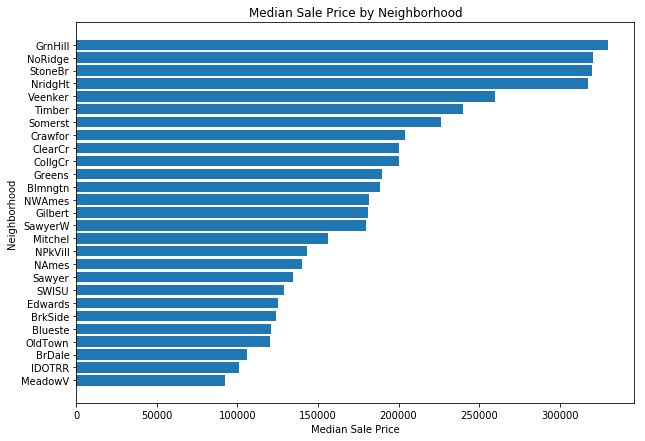

In [21]:
fig= plt.figure(figsize=(10,7))
plt.barh(sort_neigh[0], sort_neigh[1])
plt.xlabel('Median Sale Price')
plt.ylabel('Neighborhood')
plt.title('Median Sale Price by Neighborhood')

Text(0.5, 1.0, 'Median Sale Price by Exter Qual')

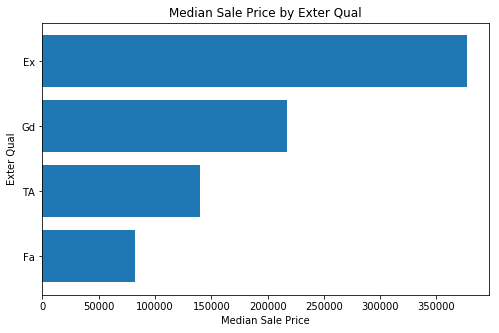

In [22]:
fig= plt.figure(figsize=(8,5))
plt.barh(sort_exter[0], sort_exter[1])
plt.xlabel('Median Sale Price')
plt.ylabel('Exter Qual')
plt.title('Median Sale Price by Exter Qual')

Text(0.5, 1.0, 'Median Sale Price by Bsmt Qual')

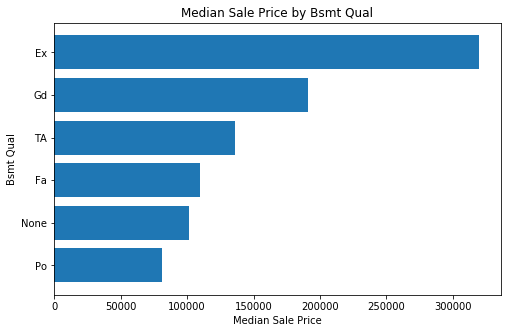

In [23]:
fig= plt.figure(figsize=(8,5))
plt.barh(sort_bsmt[0], sort_bsmt[1])
plt.xlabel('Median Sale Price')
plt.ylabel('Bsmt Qual')
plt.title('Median Sale Price by Bsmt Qual')


### Explanation:
Median of R square score is used to pick top three significant categorical variables (cv = 10), since median could reduce influence from outliers. If mean of R square is used instead, then selection of top three variables with highest score will change, and neighbourhood's score tend to decrease.

From the visualization above, we can see that Neighborhood, Exter Qual and Bsmt Qual tend to influence sale price. Further statiscal tests (e.g.: ANOVA) may be done to confirm this result.


## 1.4 
Use ColumnTransformer and pipeline to encode categorical variables. Evaluate Linear
Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default
parameters. Compare with scaling the data (within the pipeline) with StandardScaler.

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Deal with missing value in 'Electrical' variable: impute missing value with most frequent class

In [25]:
X_train['Electrical'].value_counts()
X_train['Electrical'] = X_train['Electrical'].fillna(value='SBrkr')

### Scenario: without scaling

In [26]:
cat_variables = X_train[cat_lst] #extract categorical variables
categorical2 = X_train.dtypes == object  

In [27]:
def columntransform_pipe(preprocess, model):
    """
    Return two dictionary contains cross validation score for models after building a pipeline called 'preprocess'.
    'preprocess': a ColumnTransformer constructed before
    'model': a list of models that will be tested for, such as LinearRegression().
    """
    model_dict_median = {}
    model_dict_mean={}
    R2_list_median = []
    for item in model:
        pipe = make_pipeline(preprocess, item)
        pipe.fit(X_train, y_train)
        score = cross_val_score(pipe, X_train, y_train, cv=10)
        score_median = np.round(np.median(score),5)
        score_mean = np.round(np.mean(score),5)
        model_dict_median[item] = score_median
        model_dict_mean[item] = score_mean
        R2_list_median.append(score_median)
    return model_dict_median, model_dict_mean,R2_list_median

def tidy_output(model_list, R2_list):
    R2_dict = {}
    i=0
    for item in model_list:
        R2_dict[item]=R2_list[i]
        i+=1
    return R2_dict

Make a column tranformer first, called 'preprocess_OHE'

In [28]:
preprocess_OHE = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), 
                                          categorical2),
                                        (SimpleImputer(strategy='median'), 
                                         ~categorical2))
#category 'GrnHill' in Neighborhood only has one observation, so use handle_unknown='ignore'

model = [LinearRegression(),Ridge(), Lasso(),ElasticNet()]
model_dict_median, model_dict_mean,R2_list_median = columntransform_pipe(
    preprocess_OHE, model)
model_dict_median

{LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False): 0.90979,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001): 0.74414,
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False): 0.92511,
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=0.0001, warm_start=False): 0.88277}

Print R square for each model with default parameters.

In [29]:
model_name = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']
tidy_output(model_name, R2_list_median)

{'LinearRegression': 0.90979,
 'Ridge': 0.74414,
 'Lasso': 0.92511,
 'ElasticNet': 0.88277}

### Scenario2: with scaling

In [30]:
cont_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())])
#List of (name, transformer, column(s)) tuples specifying the transformer objects to be applied to subsets of the data.
ct_onehot_sd = ColumnTransformer([("cat", OneHotEncoder(handle_unknown='ignore'),
                                   categorical2),
                                ("norm", cont_transformer,  ~categorical2)])  
ct_onehot_sd.fit_transform(X_train)

model_dict_median, model_dict_mean,R2_list_median_2 = columntransform_pipe(ct_onehot_sd, 
                                                                           model)
model_dict_median

{LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False): 0.92252,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001): 0.91684,
 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False): 0.9251,
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=0.0001, warm_start=False): 0.88158}

In [31]:
model_name = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']
tidy_output(model_name, R2_list_median_2)

{'LinearRegression': 0.92252,
 'Ridge': 0.91684,
 'Lasso': 0.9251,
 'ElasticNet': 0.88158}

### Explanation:
After standardizing continuous variables, R square (median R square of cross validation) of Ridge regression is greatly improved, increased from 0.74 to 0.91. Also, the R square of Linear regression, Lasso regression and ElasticNet model don't change significant. R squares of the four models are pretty high after scaling.

## 1.5
Tune the parameters of the models using GridSearchCV. Compare the results. Visualize the dependence of the validation score on the parameters for Ridge, Lasso and
ElasticNet

In [32]:
from sklearn.model_selection import GridSearchCV

### GridSearchCV for Ridge

In [33]:
# ct_onehot_sd is a column transformer constructed in 1.4, did OHE on categorical and standardize continuous variable
ct_onehot_sd.fit_transform(X_train)
ridge_pipe = make_pipeline(ct_onehot_sd, Ridge())
param_grid = {'ridge__alpha': np.arange(0, 100, 1)}
ridge_grid = GridSearchCV(ridge_pipe, param_grid)
ridge_grid.fit(X_train, y_train)
ridgeparam_1_6 = ridge_grid.best_params_
print(ridge_grid.best_params_)

{'ridge__alpha': 19}


In [34]:
print(ridge_grid.best_score_)

0.8749580702588093


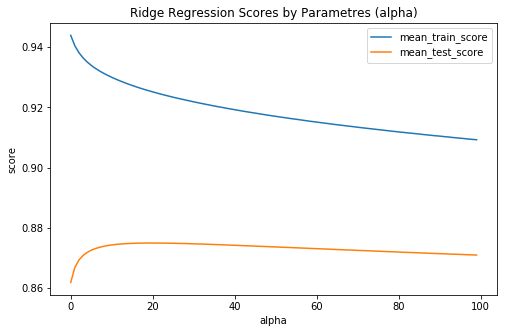

In [35]:
#get lists of mean_train_score and mean_test_score
param_list = np.arange(0, 100, 1)
ridge_mean_train_score = ridge_grid.cv_results_['mean_train_score']
ridge_mean_test_score = ridge_grid.cv_results_['mean_test_score']

#Plot graph
fig= plt.figure(figsize=(8,5))
plt.plot(param_list, ridge_mean_train_score, label = 'mean_train_score')
plt.plot(param_list, ridge_mean_test_score, label = 'mean_test_score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Ridge Regression Scores by Parametres (alpha)')
plt.show()

### GridSearchCV for Lasso

In [36]:
lasso_pipe = make_pipeline(ct_onehot_sd, Lasso())
param_grid = {'lasso__alpha': np.arange(0, 100, 1)} 
lasso_grid = GridSearchCV(lasso_pipe, param_grid)
lasso_grid.fit(X_train, y_train)
lassoparam_1_6 = lasso_grid.best_params_
print(lasso_grid.best_params_)

{'lasso__alpha': 80}


In [37]:
print(lasso_grid.best_score_)

0.8876883572331458


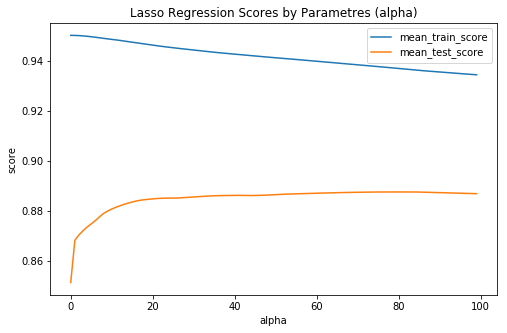

In [38]:
#get lists of mean_train_score and mean_test_score
param_list = np.arange(0, 100, 1)
lasso_mean_train_score = lasso_grid.cv_results_['mean_train_score']
lasso_mean_test_score = lasso_grid.cv_results_['mean_test_score']

#Plot graph
fig= plt.figure(figsize=(8,5))
plt.plot(param_list, lasso_mean_train_score, label = 'mean_train_score')
plt.plot(param_list, lasso_mean_test_score, label = 'mean_test_score')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('score')
plt.title('Lasso Regression Scores by Parametres (alpha)')
plt.show()

### GridSearchCV for ElasticNet

In [39]:
elastic_pipe = make_pipeline(ct_onehot_sd, ElasticNet())
#np.arange(0, 100, 1)
param_grid = {'elasticnet__alpha':[0.001, 0.01, 0.1, 1, 10, 100],
              'elasticnet__l1_ratio': [0.01, .1, .5, .9, .98, 1]} 
elastic_grid = GridSearchCV(elastic_pipe, param_grid)
elastic_grid.fit(X_train, y_train)
elasticparam_1_6 = elastic_grid.best_params_
print(elastic_grid.best_params_)

{'elasticnet__alpha': 100, 'elasticnet__l1_ratio': 1}


In [40]:
print(elastic_grid.best_score_)

0.88696294502236


In [41]:
res = pd.pivot_table(pd.DataFrame(elastic_grid.cv_results_),
    values='mean_test_score', index='param_elasticnet__alpha', 
                     columns='param_elasticnet__l1_ratio')

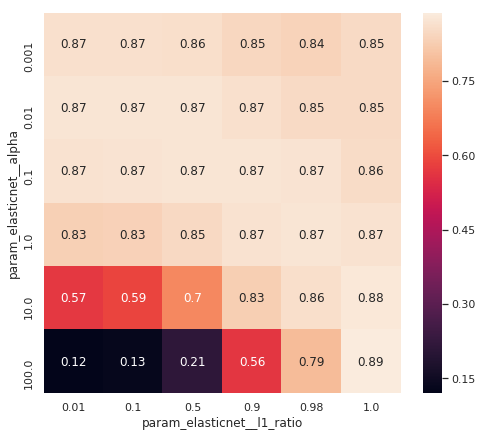

In [42]:
import seaborn as sns

sns.set(rc={'figure.figsize':(8,7)})
sns.heatmap(res, annot=True)

### Explanation:
By comparing with R square score before and after setting parameter using the GridSearchCV result, we see that R square scores don't change or improve a lot in this two scenarios.

## 1.6
Visualize the coefficients of the resulting models to find important features.
Used parameters we obtained from cross validation in section 1.5


In [43]:
ridgeparam = ridgeparam_1_6['ridge__alpha']
ridgeparam

19

In [44]:
lassoparam = lassoparam_1_6['lasso__alpha']
lassoparam

80

In [45]:
elastnicalpha = elasticparam_1_6['elasticnet__alpha']
elastnicalpha

100

In [46]:
elaticl1 = elasticparam_1_6['elasticnet__l1_ratio']
elaticl1

1

### Ridge Regression

In [47]:
ridge_pipe = Pipeline(steps=[('ohe_sd', ct_onehot_sd),
                       ('ridge', Ridge(alpha=ridgeparam))])
ridge_pipe.fit(X_train,y_train)
ridge_coef = ridge_pipe.named_steps['ridge'].coef_
#--------------------------Second method to get coefficients from pipeline------------------
#temp = make_pipeline(ct_onehot_sd, Ridge(alpha=23))
#temp.fit(X_train, y_train)
#temp.steps[1][1].coef_

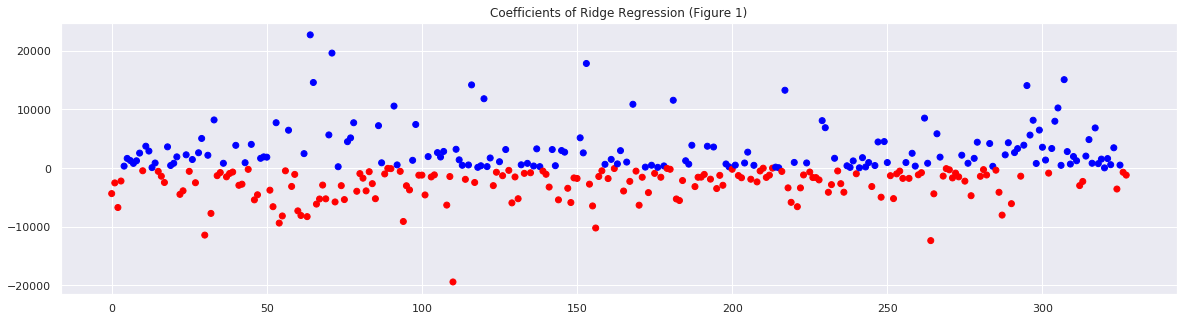

In [48]:
fig= plt.figure(figsize=(20,5))
plt.scatter(range(ridge_coef.shape[0]), ridge_coef,
            c=np.sign(ridge_coef), cmap="bwr_r")
plt.title('Coefficients of Ridge Regression (Figure 1)')
plt.show()

#### Select Important Features for Ridge Regressions

From the above graph (figure 1), it seems that ridge coefficients greater than 10000 or smaller than -10000 tend to be signifiant. So features satisfy this criteria are selected, and their coefficents are visualized again with clearer annotation.

First, in order to match coefficients with feature name, get a list called 'all_features_lst' that contain all feature names in the order which corresponds to coefficient order.

In [49]:
cont_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())])
ct_onehot_sd = ColumnTransformer([("cat", OneHotEncoder(handle_unknown='ignore'),
                                   categorical2),
                                  ("norm", cont_transformer,  ~categorical2)]) 
ct_onehot_sd.fit_transform(X_train)
features = ct_onehot_sd.named_transformers_['cat'].get_feature_names()

cat_lst = features.tolist()

continuous_lst = ["Lot Frontage", "Lot Area",'Overall Qual', 'Overall Cond', 
                  'Year Built','Year Remod/Add', "Mas Vnr Area", "BsmtFin SF 1",
                  "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "1st Flr SF", 
                  "2nd Flr SF", "Low Qual Fin SF", "Gr Liv Area", 'Bsmt Full Bath', 
                  'Bsmt Half Bath', 'Full Bath','Half Bath', 'Bedroom AbvGr', 
                  'Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt',
                  'Garage Cars',"Garage Area", "Wood Deck SF", "Open Porch SF", 
                  "Enclosed Porch", "3Ssn Porch", "Screen Porch", 
                  "Pool Area", "Misc Val", 'Mo Sold', 'Yr Sold']

def combine_twolist(list1, list2):
    lst = []
    for item in list1:
        lst.append(item)
    for item in list2:
        lst.append(item)
    return lst

all_features_lst = combine_twolist(cat_lst,continuous_lst)

In [50]:
def match_feature_coef(feature_list:list, coef_list: list):
    """
    Return a dictionary that mathes feature name with coefficients: key are features, 
    values are coefficients
    feature_list: list of feature names
    coef_list: list of coefficients
    """
    i=0
    coef_dict = {}
    for item in feature_list:
        coef_dict[item]=coef_list[i]
        i+=1
    return coef_dict

In [51]:
def select_important_features(coef_dict:dict, upper:float, lower:float):
    """
    Return a tuple: key are selected features, value are coefficients.
    upper: float, the selected features should have coeffcients higher than upper
    lower: float, the selected features should have coeffcients less than lower
    """
    select_feature_dict = {}
    for key, value in coef_dict.items():
        if value >= upper:
            select_feature_dict[key] = value
        elif value <= lower:
            select_feature_dict[key] = value
    sort_select_feature_dict = sorted(select_feature_dict.items(), 
                                      key=lambda x: x[1])
    return sort_select_feature_dict
    

In [52]:
def prepare_two_lists(sort_select_feature_dict):
    """
    Return a feature list and a coefficient list.
    Input is a list containg tuples(size=2)
    """
    feature_list = []
    coef_list = []
    for item in sort_select_feature_dict:
        feature_list.append(item[0])
        coef_list.append(item[1])
    return feature_list, coef_list

In [53]:
ridge_coef_lst = ridge_coef.tolist()
ridge_coef_dict = match_feature_coef(all_features_lst,ridge_coef_lst)

ridge_sort_select_feature_dict = select_important_features(ridge_coef_dict, 
                                                           10000,-10000)

Plot graph on important features of Ridge Regression

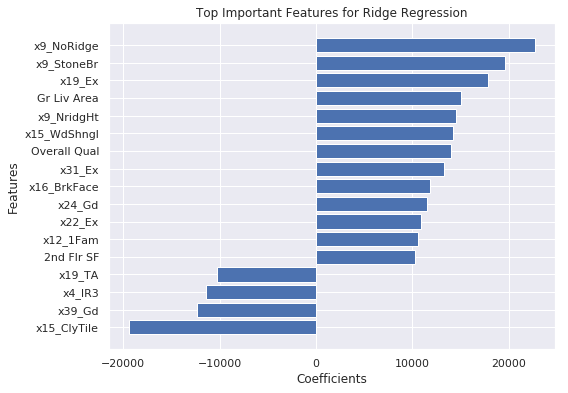

In [54]:
feature_list_ridge, coef_list_ridge = prepare_two_lists(
    ridge_sort_select_feature_dict)
fig= plt.figure(figsize=(8,6))
plt.barh(feature_list_ridge,coef_list_ridge)
plt.title('Top Important Features for Ridge Regression')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

### Lasso Regression

In [55]:
lasso_pipe = Pipeline(steps=[('ohe_sd', ct_onehot_sd),
                       ('lasso', Lasso(alpha=lassoparam))])
lasso_pipe.fit(X_train,y_train)
lasso_coef = lasso_pipe.named_steps['lasso'].coef_

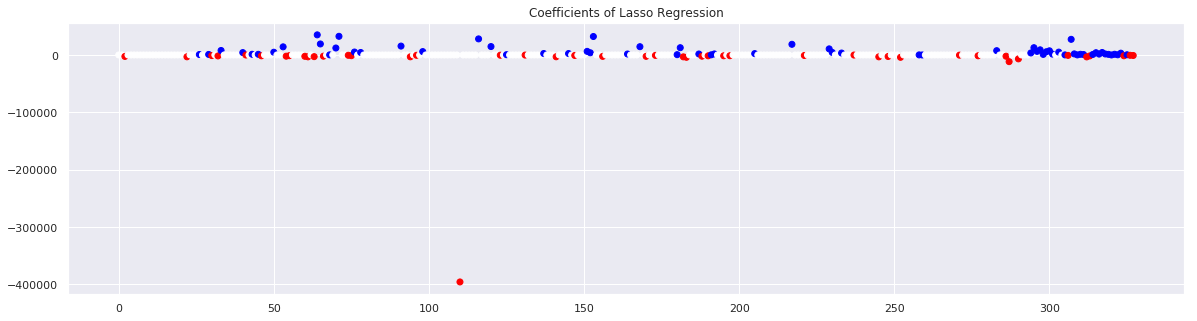

In [56]:
fig= plt.figure(figsize=(20,5))
plt.scatter(range(lasso_coef.shape[0]), lasso_coef,
            c=np.sign(lasso_coef), cmap="bwr_r")
plt.title('Coefficients of Lasso Regression')
plt.show()

#### Select Important Features for Lasso Regression

In [57]:
lasso_coef_lst = lasso_coef.tolist()
lasso_coef_dict = match_feature_coef(all_features_lst,lasso_coef_lst)
lasso_sort_select_feature_dict = select_important_features(lasso_coef_dict, 
                                                           10000, -10000)

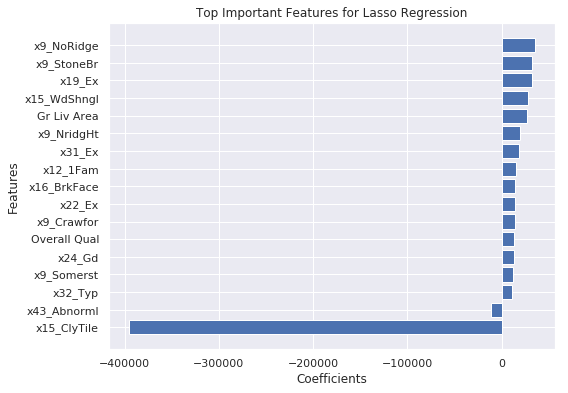

In [58]:
feature_list_lasso, coef_list_lasso = prepare_two_lists(
    lasso_sort_select_feature_dict)
fig= plt.figure(figsize=(8,6))
plt.barh(feature_list_lasso,coef_list_lasso)
plt.title('Top Important Features for Lasso Regression')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

### ElasticNet Regression

In [59]:
elasticnet_pipe = Pipeline(steps=[('ohe_sd', ct_onehot_sd),
                       ('elasticnet', ElasticNet(alpha = elastnicalpha, 
                                                 l1_ratio = elaticl1))])
elasticnet_pipe.fit(X_train,y_train)
elasticnet_coef = elasticnet_pipe.named_steps['elasticnet'].coef_

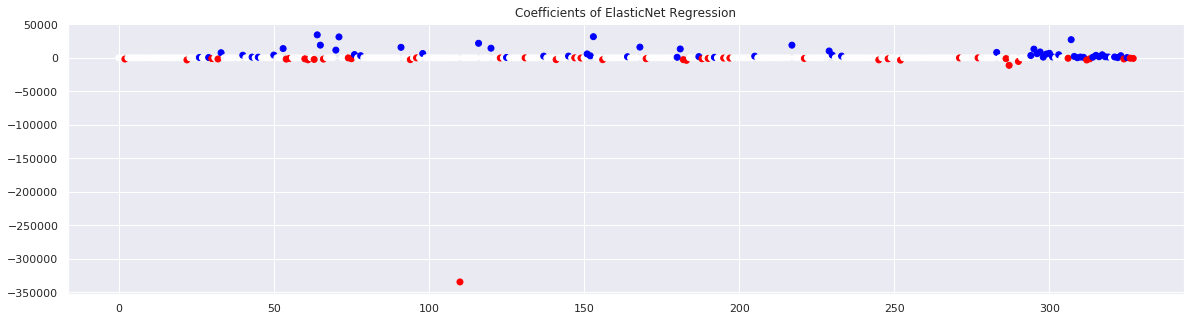

In [60]:
fig= plt.figure(figsize=(20,5))
plt.scatter(range(elasticnet_coef.shape[0]), elasticnet_coef,
            c=np.sign(elasticnet_coef), cmap="bwr_r")
plt.title('Coefficients of ElasticNet Regression')
plt.show()

#### Select Important Features for ElasticNet Regression

In [61]:
elastic_coef_lst = elasticnet_coef.tolist()
elastic_coef_dict = match_feature_coef(all_features_lst,elastic_coef_lst)
elastic_sort_select_feature_dict = select_important_features(elastic_coef_dict, 
                                                             10000, -10000)

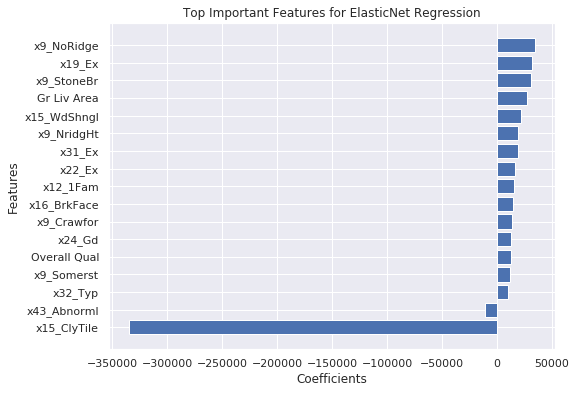

In [62]:
feature_list_elastic, coef_list_elastic = prepare_two_lists(
    elastic_sort_select_feature_dict)
fig= plt.figure(figsize=(8,6))
plt.barh(feature_list_elastic,coef_list_elastic)
plt.title('Top Important Features for ElasticNet Regression')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

### Linear Regression

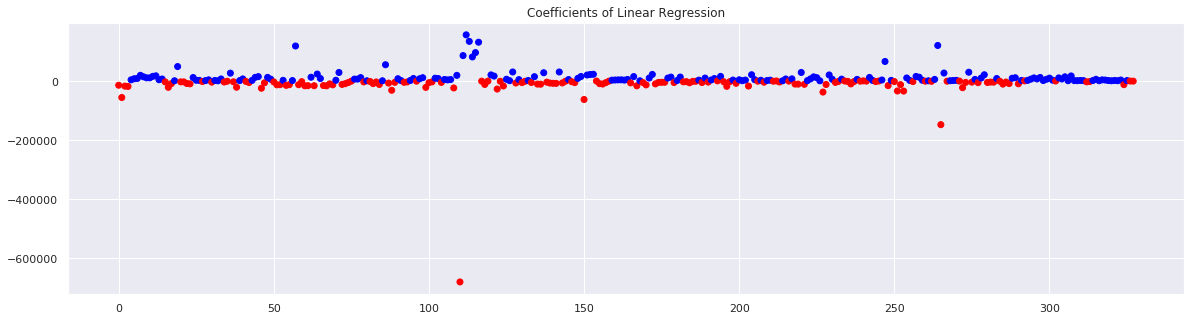

In [63]:
lr_pipe = Pipeline(steps=[('ohe_sd', ct_onehot_sd),
                       ('lr', LinearRegression())])
lr_pipe.fit(X_train,y_train)
lr_coef = lr_pipe.named_steps['lr'].coef_

fig= plt.figure(figsize=(20,5))
plt.scatter(range(lr_coef.shape[0]), lr_coef,
            c=np.sign(lr_coef), cmap="bwr_r")
plt.title('Coefficients of Linear Regression')
plt.show()

#### Select Important Features for ElasticNet Regression

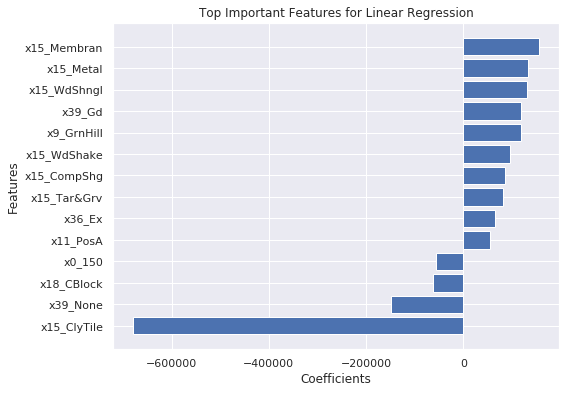

In [64]:
lr_coef_lst = lr_coef.tolist()
lr_coef_dict = match_feature_coef(all_features_lst,lr_coef_lst)
lr_sort_select_feature_dict = select_important_features(lr_coef_dict, 
                                                        50000,-50000)

feature_list_lr, coef_list_lr = prepare_two_lists(lr_sort_select_feature_dict)
fig= plt.figure(figsize=(8,6))
plt.barh(feature_list_lr,coef_list_lr)
plt.title('Top Important Features for Linear Regression')
plt.xlabel('Coefficients')
plt.ylabel('Features')
plt.show()

### Explanation:
Lasso Regression and ElasticNet Regression give same result of coefficients beause ElasticNet Regression's L1 ration = 1. Lasso Regression, ElasticNet Regression shows similar feature important: all of them shows that feature 'x15_ClyTile' (categorical varibale: Roof Matl) is much more important than other features. Ridge regression shows more important features, such as X15_ClyTile, x9_NoRidge, x9_StoneBr(categorical variable: Neighborhood), Gr Liv Area.

However, we may not trust these models' coefficients, because there are many features(over 300) in models, so models tend to have multicolinearity problem, which may make models' coefficients sensitive.
